<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Simple%20Chest%20XRay/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.simplefilter("ignore")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_path = "/content/drive/My Drive/Simple_Chest_XRay/"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"
#data_path = "/content/drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 1
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**


In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

 **DOWNLOAD RESNET18 MODEL AND TRAIN**


In [ ]:
# Define the ResNet18 model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained = False)
model.fc = nn.Linear(512, len(dataset.classes))
model.to(device)

# Define loss function a  s CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "ResNet18", num_epochs)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
Epoch 1/20: 100%|██████████| 43/43 [01:21<00:00,  1.89s/batch, Accuracy=0.889, Loss=0.26, Precision=0.852, Recall=0.883, F1 Score=0.865]


VALIDATION: Accuracy: 0.7440 | Loss: 0.8251 | Recall: 0.5482 | Precision: 0.8684 | F-score: 0.5122



Epoch 2/20: 100%|██████████| 43/43 [01:18<00:00,  1.83s/batch, Accuracy=0.766, Loss=0.623, Precision=0.781, Recall=0.774, F1 Score=0.778]


VALIDATION: Accuracy: 0.8857 | Loss: 0.2483 | Recall: 0.8255 | Precision: 0.8850 | F-score: 0.8482



Epoch 3/20: 100%|██████████| 43/43 [01:19<00:00,  1.85s/batch, Accuracy=0.915, Loss=0.212, Precision=0.818, Recall=0.814, F1 Score=0.816]


VALIDATION: Accuracy: 0.8805 | Loss: 0.2726 | Recall: 0.7928 | Precision: 0.9200 | F-score: 0.8298



Epoch 4/20: 100%|██████████| 43/43 [01:19<00:00,  1.85s/batch, Accuracy=0.924, Loss=0.19, Precision=0.84, Recall=0.834, F1 Score=0.837]


VALIDATION: Accuracy: 0.9130 | Loss: 0.2211 | Recall: 0.9265 | Precision: 0.8825 | F-score: 0.8991



Epoch 5/20: 100%|██████████| 43/43 [01:20<00:00,  1.87s/batch, Accuracy=0.935, Loss=0.165, Precision=0.856, Recall=0.85, F1 Score=0.853]


VALIDATION: Accuracy: 0.9249 | Loss: 0.1720 | Recall: 0.8839 | Precision: 0.9286 | F-score: 0.9027



Epoch 6/20: 100%|██████████| 43/43 [01:22<00:00,  1.92s/batch, Accuracy=0.936, Loss=0.164, Precision=0.867, Recall=0.861, F1 Score=0.864]


VALIDATION: Accuracy: 0.9334 | Loss: 0.1638 | Recall: 0.8953 | Precision: 0.9392 | F-score: 0.9139



Epoch 7/20: 100%|██████████| 43/43 [01:21<00:00,  1.90s/batch, Accuracy=0.945, Loss=0.135, Precision=0.876, Recall=0.87, F1 Score=0.873]


VALIDATION: Accuracy: 0.9420 | Loss: 0.1420 | Recall: 0.9158 | Precision: 0.9395 | F-score: 0.9266



Epoch 8/20: 100%|██████████| 43/43 [01:19<00:00,  1.85s/batch, Accuracy=0.951, Loss=0.126, Precision=0.884, Recall=0.879, F1 Score=0.881]


VALIDATION: Accuracy: 0.9488 | Loss: 0.1348 | Recall: 0.9351 | Precision: 0.9384 | F-score: 0.9367



Epoch 9/20: 100%|██████████| 43/43 [01:22<00:00,  1.93s/batch, Accuracy=0.959, Loss=0.112, Precision=0.892, Recall=0.886, F1 Score=0.889]


VALIDATION: Accuracy: 0.9437 | Loss: 0.1329 | Recall: 0.9243 | Precision: 0.9357 | F-score: 0.9298



Epoch 10/20: 100%|██████████| 43/43 [01:22<00:00,  1.91s/batch, Accuracy=0.964, Loss=0.0935, Precision=0.898, Recall=0.893, F1 Score=0.895]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1153 | Recall: 0.9466 | Precision: 0.9482 | F-score: 0.9474



Epoch 11/20: 100%|██████████| 43/43 [01:21<00:00,  1.89s/batch, Accuracy=0.96, Loss=0.101, Precision=0.903, Recall=0.898, F1 Score=0.9]


VALIDATION: Accuracy: 0.9522 | Loss: 0.1371 | Recall: 0.9302 | Precision: 0.9509 | F-score: 0.9398



Epoch 12/20: 100%|██████████| 43/43 [01:23<00:00,  1.94s/batch, Accuracy=0.965, Loss=0.0934, Precision=0.907, Recall=0.903, F1 Score=0.905]


VALIDATION: Accuracy: 0.9539 | Loss: 0.1196 | Recall: 0.9314 | Precision: 0.9540 | F-score: 0.9419



Epoch 13/20: 100%|██████████| 43/43 [01:22<00:00,  1.91s/batch, Accuracy=0.971, Loss=0.0724, Precision=0.912, Recall=0.907, F1 Score=0.909]


VALIDATION: Accuracy: 0.9556 | Loss: 0.1312 | Recall: 0.9454 | Precision: 0.9454 | F-score: 0.9454



Epoch 14/20: 100%|██████████| 43/43 [01:22<00:00,  1.92s/batch, Accuracy=0.964, Loss=0.0921, Precision=0.915, Recall=0.91, F1 Score=0.913]


VALIDATION: Accuracy: 0.9573 | Loss: 0.1460 | Recall: 0.9338 | Precision: 0.9605 | F-score: 0.9459



Epoch 15/20: 100%|██████████| 43/43 [01:25<00:00,  1.98s/batch, Accuracy=0.974, Loss=0.0728, Precision=0.918, Recall=0.914, F1 Score=0.916]


VALIDATION: Accuracy: 0.9539 | Loss: 0.1144 | Recall: 0.9515 | Precision: 0.9376 | F-score: 0.9442



Epoch 16/20: 100%|██████████| 43/43 [01:23<00:00,  1.94s/batch, Accuracy=0.973, Loss=0.0728, Precision=0.921, Recall=0.917, F1 Score=0.919]


VALIDATION: Accuracy: 0.9659 | Loss: 0.1051 | Recall: 0.9489 | Precision: 0.9665 | F-score: 0.9572



Epoch 17/20: 100%|██████████| 43/43 [01:24<00:00,  1.96s/batch, Accuracy=0.981, Loss=0.0529, Precision=0.925, Recall=0.92, F1 Score=0.923]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1088 | Recall: 0.9611 | Precision: 0.9484 | F-score: 0.9544



Epoch 18/20: 100%|██████████| 43/43 [01:24<00:00,  1.96s/batch, Accuracy=0.979, Loss=0.0593, Precision=0.928, Recall=0.923, F1 Score=0.925]


VALIDATION: Accuracy: 0.9625 | Loss: 0.1126 | Recall: 0.9392 | Precision: 0.9682 | F-score: 0.9523



Epoch 19/20: 100%|██████████| 43/43 [01:25<00:00,  1.99s/batch, Accuracy=0.985, Loss=0.0392, Precision=0.93, Recall=0.926, F1 Score=0.928]


VALIDATION: Accuracy: 0.9590 | Loss: 0.1452 | Recall: 0.9350 | Precision: 0.9637 | F-score: 0.9480



Epoch 20/20: 100%|██████████| 43/43 [01:26<00:00,  2.00s/batch, Accuracy=0.989, Loss=0.0319, Precision=0.933, Recall=0.929, F1 Score=0.931]


VALIDATION: Accuracy: 0.9642 | Loss: 0.1013 | Recall: 0.9604 | Precision: 0.9523 | F-score: 0.9563

[0.26026202372208723, 0.6233695970603274, 0.2120919976402533, 0.18972522627801305, 0.16519693304312233, 0.16359962942499043, 0.1345113130873894, 0.12648246012524472, 0.11169907397236815, 0.0934581851809817, 0.10083207577488777, 0.09339687339807028, 0.07239830867637509, 0.09214521172563458, 0.07283058685209001, 0.07281481958952989, 0.05288402761634195, 0.059270327886696936, 0.03919073106472479, 0.03190121432472312] [0.8251181897856676, 0.24834805340490243, 0.27261529450937344, 0.22111985748538385, 0.17201383701770379, 0.16376029956869706, 0.14200975234801452, 0.13477527516108934, 0.13291411639633033, 0.11533337821325751, 0.13713266377562955, 0.11961223058078324, 0.13117166206641154, 0.14599780996454048, 0.11439624133777293, 0.1050591233342174, 0.10877843603885927, 0.11255094560289139, 0.14516717344109262, 0.1013102003535313]


**SAVE MODEL PARAMETERS**

In [ ]:
torch.save(model.state_dict(), "{}resnet18.pth".format(data_path))

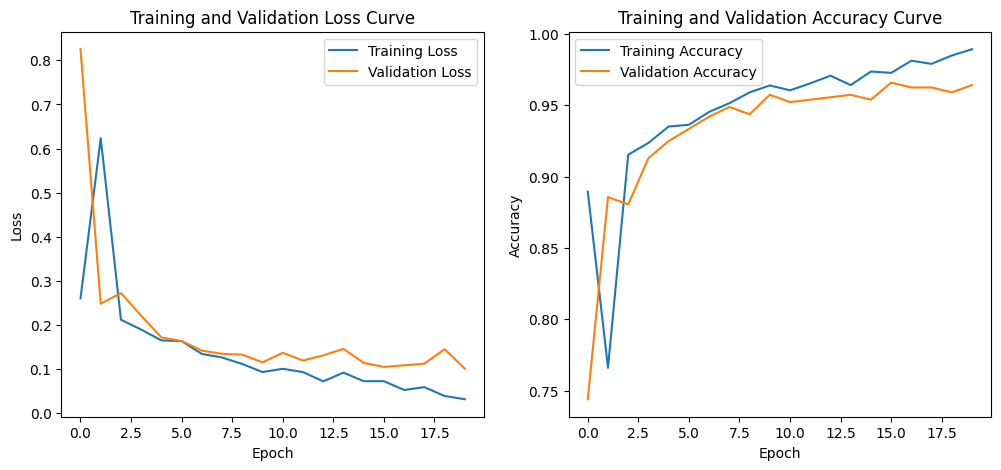

In [ ]:
#Plot the Model Accuracy and Loss on Training and Validation Sets
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

**EVALUATE MODEL ON TEST SET**

TEST: Accuracy: 0.9658 | Loss: 0.1004 | Recall: 0.9591 | Precision: 0.9556 | F-score: 0.9573



<Figure size 800x800 with 0 Axes>

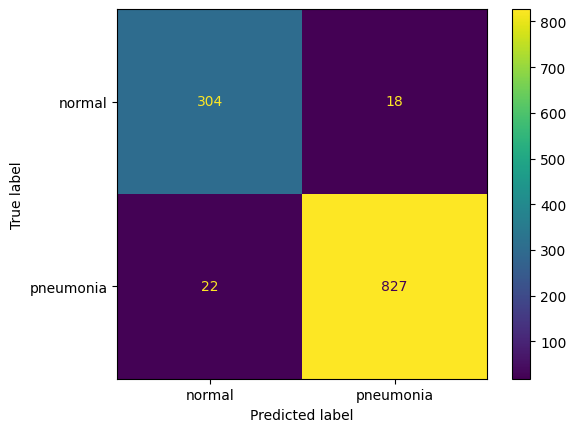

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "ResNet18")

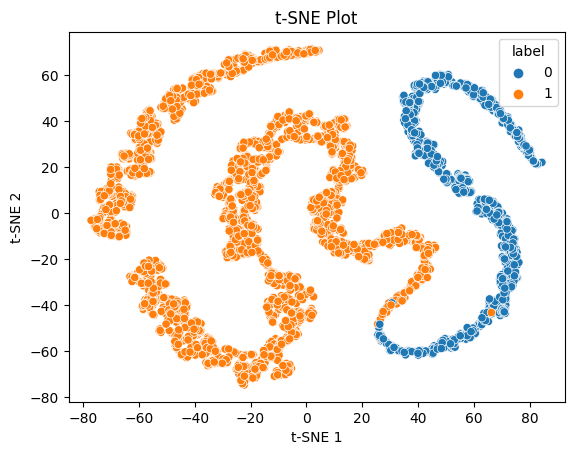

In [ ]:
#Obtain the TSNE Plot
plot_TSNE(train_loader, device, model)

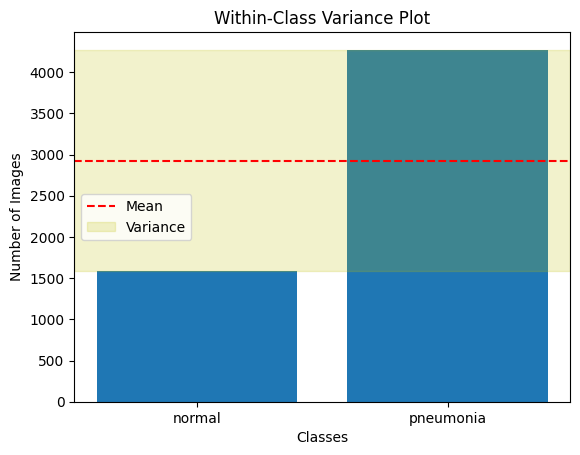

In [ ]:
#Plot the Within-Class Variance of the dataset
plot_within_class_variance(dataset)